# Convolutional Neural Network (CNN) From Scratch

#### Jian Dai, PhD (daij12@gene.com)

Refer to my tutorial https://github.com/jiandai/mlTst/blob/master/tensorflow/ann101.ipynb for a brief intro to Artificial Neural Network (ANN)

## Goal

* **Exercise one** Play with convolution kernel

* **Exercise two** "hand code" a simple CNN including gradient descent

## Plan

* Part one: convolution as an image processing technique

    - Use the UCI semeion dataset as example (which is much simpler than MNIST data) https://archive.ics.uci.edu/ml/machine-learning-databases/semeion/
    - Choose your language, be it Python, R, MATLAB, *et cetera*
    - Read in the data
    - Convert to $16 \times 16$ frame
    - Visualization a few samples
    - Define zero padding
    - Define convolution kernels with different size
    - Define the convolution of the kernel and the pixel array, specify the stride

* Part two: Convolutional neural network model

    - Define 2d convolution layer
    - Use standard logistic (aka sigmoid) function as activation
    - Add fully connected softmax layer
    - Specify cross entropy as loss
    - **Derive the gradient**
    - **Code gradient descent for CNN**
    - Run training and monitor the training error
    
    
## Some notes

### Concept
- Fully connected ANN
- Locally connected ANN
- Locally connected ANN with shared weight = CNN

### What is NOT
- Not an attemp to build a state of the art DL model
- Not an intro to image processing in general, convolution technique in particular. Use this ref as starting point http://db.cs.duke.edu/courses/cps196.1/spring04/handouts/Image%20Processing.pdf
- Not a thorough process of ML

### Not-included (yet) but important
- A thorough Machine Learning pipeline including the splitting dataset into training/validation/test, hyperparameter tuning and model selection, validation and testing
- Visualization of the effect of convolution kernels
- Use tensorflow or other Deep Learning libraries and compare the notes
- No bias node in convolution layer
- Exercise on pooling layer, dropout layer, other activation function eg ReLU, *et cetera*

### Part ONE: Convolution

#### Data

##### Metadata
https://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.names

##### Data
https://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data

In [1]:
# semeion data is downloaned, named as "semeion.data.txt", and put in the following path relative to the current working dir
import pandas as pd
dataset = pd.read_table('data/semeion.data.txt',sep='\s+',header=None)
X,Y = dataset[list(range(256))],dataset[list(range(256,266))] # Seperate features and labels

In [2]:
# Check the sample size
X.shape,Y.shape

((1593, 256), (1593, 10))

In [3]:
# Reshape features into pixel matrices
x = X.values.reshape(X.shape[0],16,16)
y = Y.values

In [4]:
import matplotlib.pyplot as plt

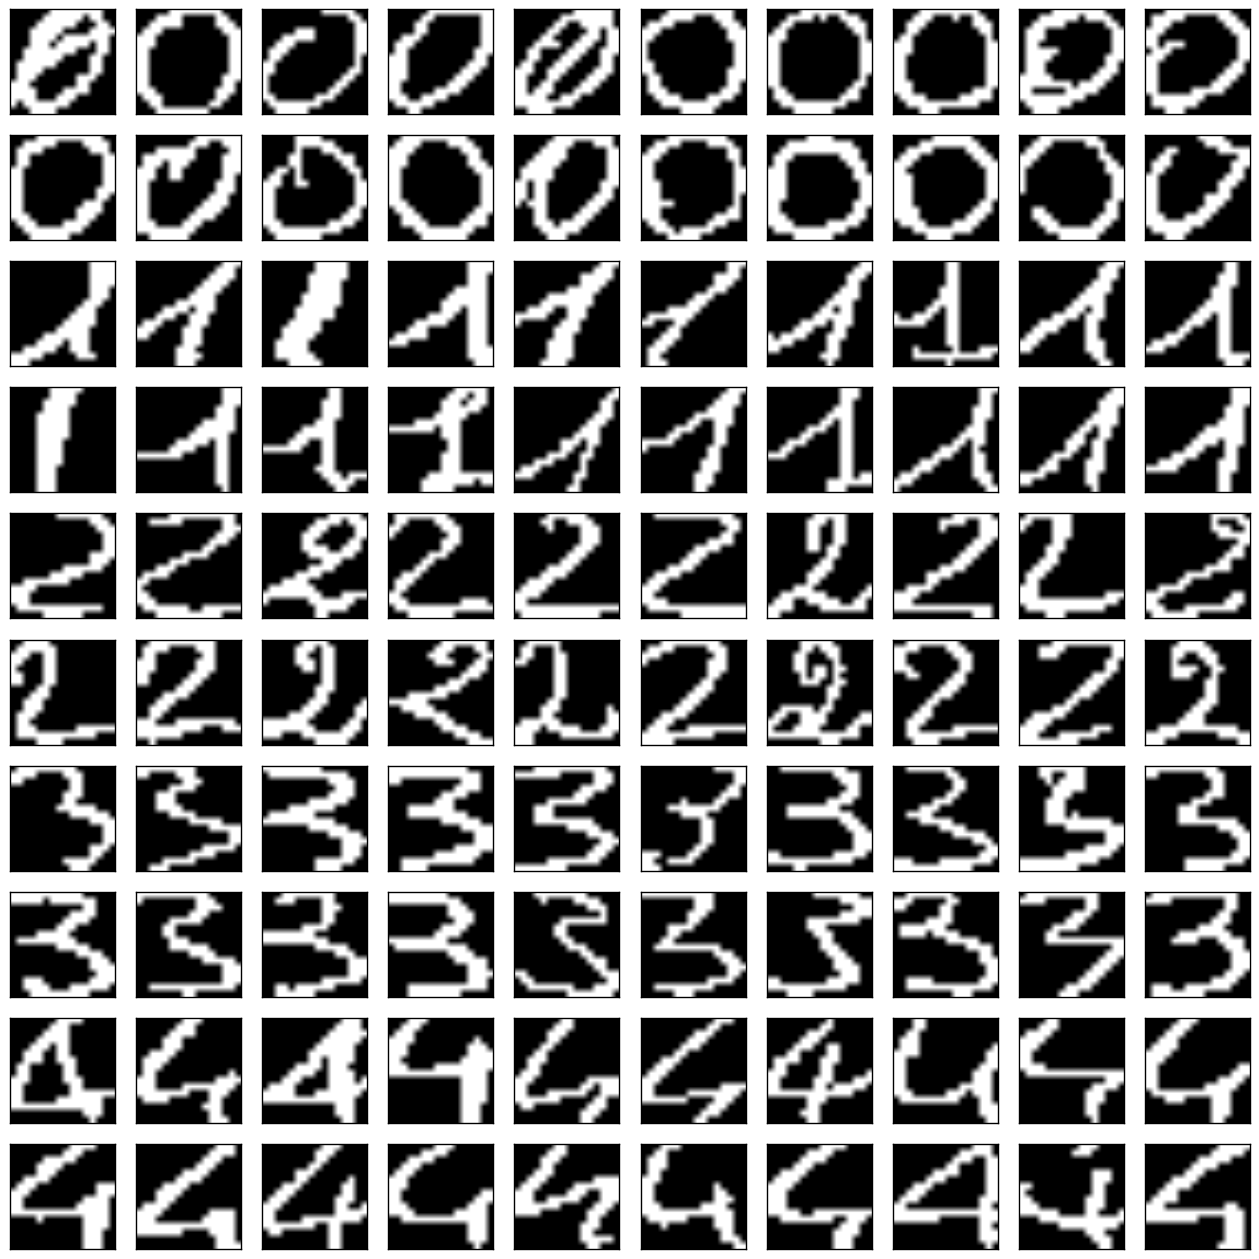

In [5]:
fig,ax = plt.subplots(10,10,figsize=[16,16])
for j in range(100):
    ax[j//10,j%10].set_xticks([])
    ax[j//10,j%10].set_yticks([])
    ax[j//10,j%10].imshow(x[j],cmap='gray')    
plt.show()

In [6]:
# one-hot label
y[:100]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0,

In [7]:
# Take a look at 16*16 raw pixels
x[0]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
         1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
         1.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
         1.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
         1.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0

#### Convolution

The key question in (discrete) convolution is to determine output size. Here is the formula

$$ V = \frac{U+2\times P-K}{S}+1 $$

where $U$ is the input size, $P$ amount of *zero padding*, $K$ kernel size, $S$ stride size and $V$ the output size.
For simplicity, we take 2d image as example and assume the input, output and kernel are all in square shape.

The output image is computed by convolving input image with the kernel

$$ \psi(i,j) = \sum_{a,b=1}^U K(a,b)\times \phi(S\times i+a,S\times j+b) $$

for $i, j = 1,2,\ldots, V$ where $\phi$ the input, $\psi$ the output.

Note we don't follow the usual mathematical convention $\psi(x,y) = \int K(a,b) \phi(x-a,y-b) da db$ to use *minus* signs.

The following [Jupyter Notebook](http://jupyter.org/) cell gives the implementation.

In [1]:
# Implementation
import numpy as np
def conv2(phi, K,
          padding = 0, # "VALID" padding scheme = No zero padding
          stride=2
         ):
    size = phi.shape[0] # Assume X is a square
    kernel_size = K.shape[0]
    # Key formula
    out_size = (size+2*padding-kernel_size)/stride+1
    out_size = int(out_size)
    #print('Output size:',out_size)
    padded_x = np.zeros([size+2*padding,size+2*padding])
    padded_x[padding:(padding+size),padding:(padding+size)] = phi
    psi = np.zeros([out_size,out_size])
    for i in range(out_size):
        for j in range(out_size):
            x0,y0=i*stride,j*stride
            #print(x0,y0)
            # Compute the convolution for output at [i,j]
            for a in range(kernel_size):
                for b in range(kernel_size):
                    psi[i,j] += K[a,b]*padded_x[x0+a,y0+b]
    return psi

In [9]:
# Take some sample images
conv2(x[1004],np.ones([6,6]),padding=0)

array([[ 12.,  12.,  10.,   7.,   6.,   6.],
       [ 18.,  16.,  13.,  10.,   8.,   5.],
       [ 13.,  10.,   8.,  10.,  13.,  11.],
       [  6.,   6.,   7.,  11.,  18.,  17.],
       [  5.,   3.,   1.,   7.,  17.,  18.],
       [ 13.,  14.,  11.,  13.,  15.,  13.]])

In [10]:
# Change "hyperparameters"
conv2(x[1004],np.ones([9,9]),padding=0,stride=7)

array([[ 25.,  21.],
       [ 18.,  28.]])

In [11]:
# Another example
conv2(x[1004],np.ones([7,7]),padding=0,stride=3)

array([[ 21.,  19.,  14.,  10.],
       [ 17.,  13.,  13.,  13.],
       [ 10.,   9.,  19.,  23.],
       [ 15.,  14.,  17.,  18.]])

In [12]:
# "SAME" scheme padding
K_SIZE = 3
Sample_id =[0,19,113,299,377]
yhat = np.zeros([5,16,16])
for j in range(len(Sample_id)):
    yhat[j] = conv2(x[Sample_id[j]],np.ones([K_SIZE,K_SIZE]),padding=1,stride=1)

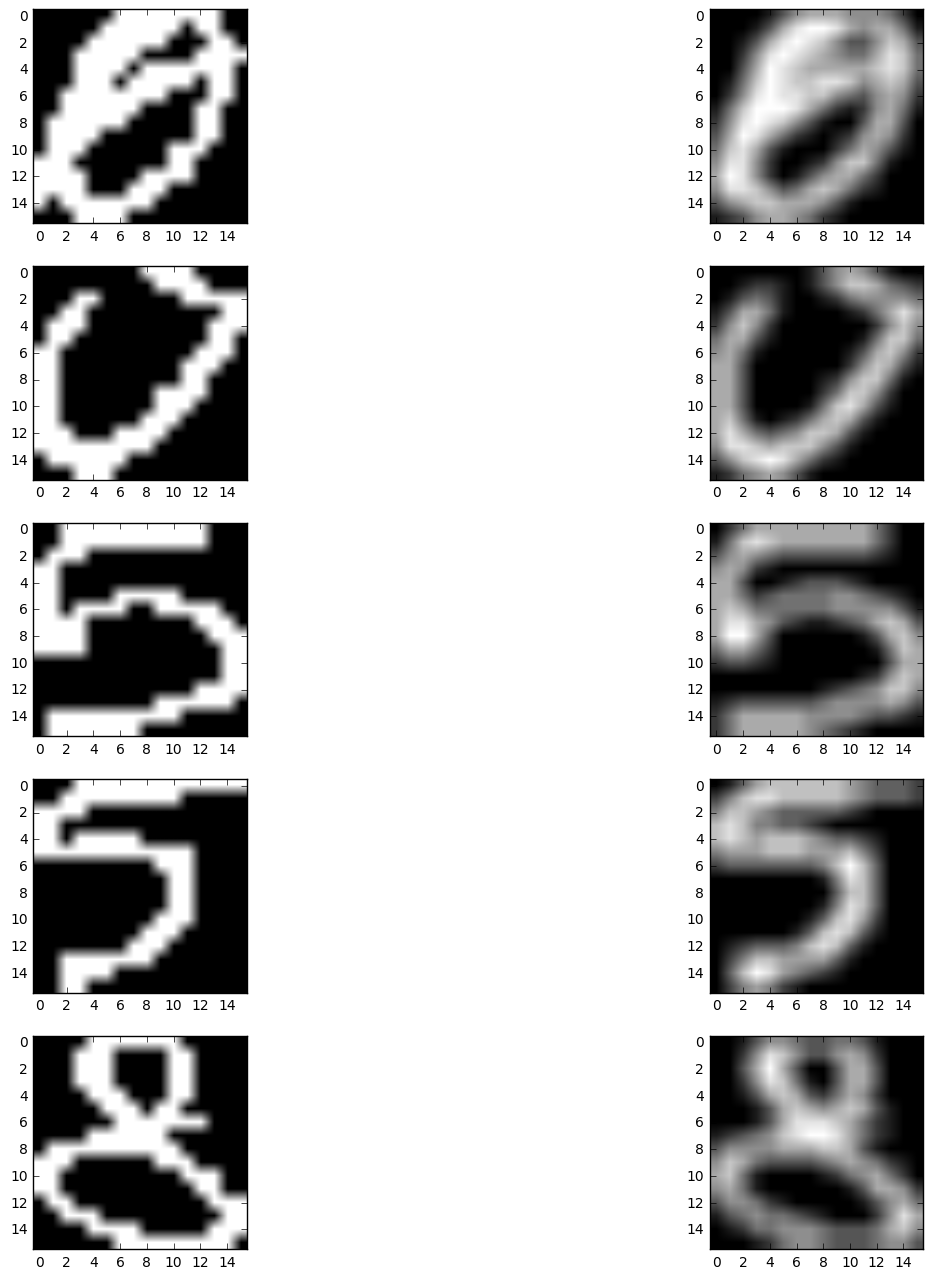

In [13]:
fig,ax = plt.subplots(5,2,figsize=[16,16])
for j in range(5):
    ax[j,0].imshow(x[Sample_id[j]],cmap='gray')
    ax[j,1].imshow(yhat[j],cmap='gray')
plt.show()

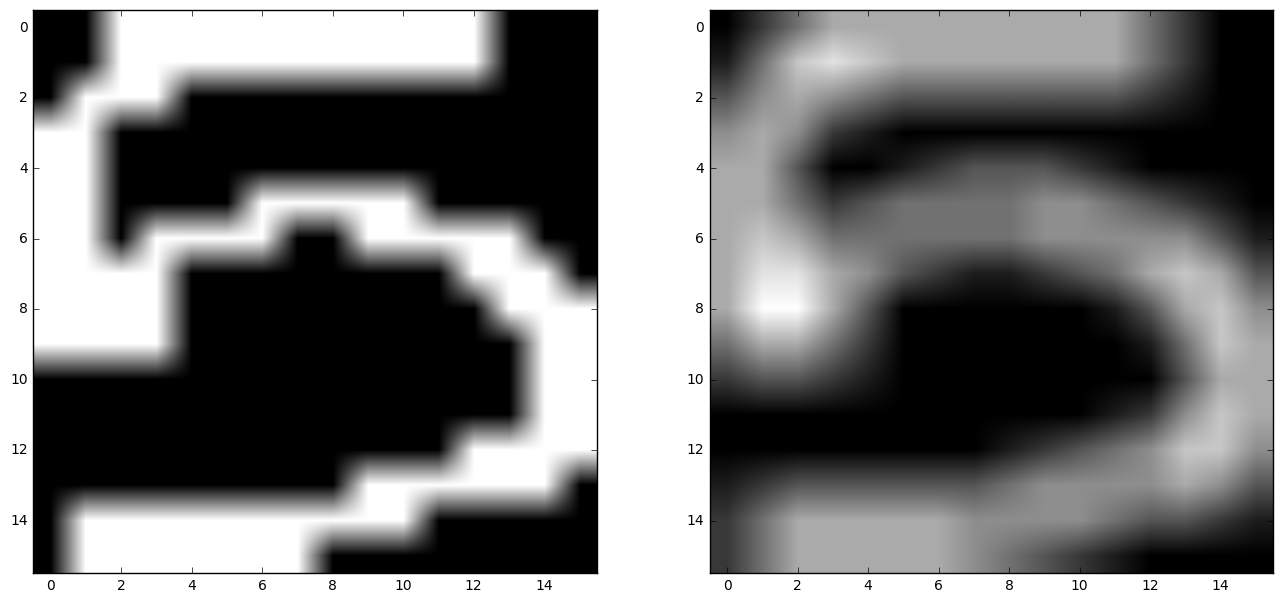

In [14]:
fig,ax = plt.subplots(1,2,figsize=[16,16])
ax[0].imshow(x[Sample_id[2]],cmap='gray')
ax[1].imshow(yhat[2],cmap='gray')
plt.show()

### Part TWO:
Now we build a convolutional neural network from scratch.. Well I mean by using [numpy](http://www.numpy.org/) :)

The CNN is defined as follows

\begin{eqnarray*} 
\psi_c(i,j) &=& \sum_{a,b} K_c(a,b)\times \phi(S\times i+a,S\times j+b) \\
h_{cij} &=& \sigma ( \psi_c(i,j) ) \\
\eta_d &=& \sum_{cij} h_{cij} W^{cij}_d + b_d \\
p_d &=& \mathtt {softmax} (\eta_d) \\
\end{eqnarray*}

where $\phi$ the input pixel data ($16\times 16$ in our case), $\psi$ is the convolved image, $\sigma$ the standard logistic function (aka sigmoid function) as the activation, $\eta_d$ the logits to be fed into softmax function, and $p_d$ the predicted probability of an image indicating certain digit.

The loss function to be optimized is a normalized *cross entropy*
$$ l = - \frac{1}{\log 10} \sum_{d=1}^{10} y_d \log p_d $$

We use stochastic gradient boost here so there is no summation over sample or batch.

The gradient is given as follows

\begin{eqnarray*}
\frac{\partial l}{\partial W^{cij}_d} &=& -\frac{1}{\log 10} (y_d - p_d) h_{cij} \\
\frac{\partial l}{\partial b_d} &=& -\frac{1}{\log 10} (y_d - p_d)  \\
\frac{\partial l}{\partial K_c(a,b)} &=& -\frac{1}{\log 10} \sum_{i,j}\sum_d \big((y_d - p_d) W^{cij}_d\big) h_{cij} (1-h_{cij}) \phi(S\times i+a,S\times j+b) \\
\end{eqnarray*}

In particular, the last formula gives the gradient with respect to the convolution kernel.

In [15]:
# A simply convolutional neural network
#1*16*16 => 3*7*7 by using zero padding, 4*4 kernel, and stride 2

# Initialize SGD setting
num_it = 10000
check =200
error = np.zeros([num_it])

# Shuffle the data
shuffled_indice = np.random.choice(x.shape[0], size=num_it, replace=True)
x=x[shuffled_indice]
y=y[shuffled_indice]

# Define the model architecture
num_class = 10
num_channel = 3
K_SIZE = 4
H_SIZE = 7
# Stride size
s = 2
# Learning rate for SGD
lr = .1

# Initialize the parameter values
K = np.random.random([num_channel,K_SIZE,K_SIZE])
W = np.random.normal(0,.01,size=[num_class,num_channel,H_SIZE,H_SIZE])
b = np.zeros(num_class)

# Initialize the Gradient values
grad_W = np.zeros(W.shape)
grad_b = np.zeros(b.shape)
grad_K = np.zeros(K.shape)

# Initialize intermedia variable values
h = np.zeros([num_channel,H_SIZE,H_SIZE])
X_ = np.zeros([H_SIZE,H_SIZE,K_SIZE,K_SIZE])

# Normalization constant
N = np.log(num_class * 1.)

for id in range(x.shape[0]):
    x_ = x[id]
    y_ = y[id]
    for ch in range(num_channel):
        h[ch] = conv2(x_,K[ch],stride=s)
    h = 1/(1+np.exp(-h))
    logits = np.tensordot(h,W,axes=([0,1,2],[1,2,3])) + b
    p = np.exp(logits) / np.exp(logits).sum()
    cross_entropy = -(y_*np.log(p)).sum()/ N # aka normalized log likelihood, Kullback-Lebler divergent
    error[id] = cross_entropy
    if id % check ==0:
        print("SGD iteration",id,": loss=",cross_entropy)
    # Gradient /w respect to coeff in logits for softmax layer
    grad_W = - np.tensordot((y_ - p).reshape(num_class,1), h.reshape(1,num_channel,H_SIZE,H_SIZE),  axes=([1],[0])) / N
    grad_b = - np.tensordot((y_ - p).reshape(num_class,1), np.ones([1]),  axes=([1],[0])) / N
    for i in range(H_SIZE):
        for j in range(H_SIZE):
            for l in range(K_SIZE):
                for m in range(K_SIZE):
                    X_[i,j,l,m] = x_[s*i+l,s*j+m]
    # Gradient /w respect to the Kernel
    grad_K = - np.tensordot(np.tensordot((y_ - p), W,  axes=([0],[0])) * h * (1-h), X_,axes=([1,2],[0,1])) / N
    W += -grad_W * lr
    b += -grad_b * lr
    K += -grad_K * lr
#

SGD iteration 0 : loss= 0.979456253457
SGD iteration 200 : loss= 0.364448326146
SGD iteration 400 : loss= 0.322660150262
SGD iteration 600 : loss= 0.496278973921
SGD iteration 800 : loss= 0.367675857016
SGD iteration 1000 : loss= 0.197428856575
SGD iteration 1200 : loss= 1.14877720248
SGD iteration 1400 : loss= 0.00879196779663
SGD iteration 1600 : loss= 0.0138683182651
SGD iteration 1800 : loss= 0.0122201289985
SGD iteration 2000 : loss= 0.0134934004146
SGD iteration 2200 : loss= 0.592261712552
SGD iteration 2400 : loss= 0.0213661875143
SGD iteration 2600 : loss= 0.0372889832631
SGD iteration 2800 : loss= 0.110766825032
SGD iteration 3000 : loss= 0.210030354988
SGD iteration 3200 : loss= 0.136305931112
SGD iteration 3400 : loss= 0.0136787686585
SGD iteration 3600 : loss= 1.49286134382
SGD iteration 3800 : loss= 0.00285758957626
SGD iteration 4000 : loss= 0.000811637212985
SGD iteration 4200 : loss= 0.835379915082
SGD iteration 4400 : loss= 0.0256370090645
SGD iteration 4600 : loss= 0.

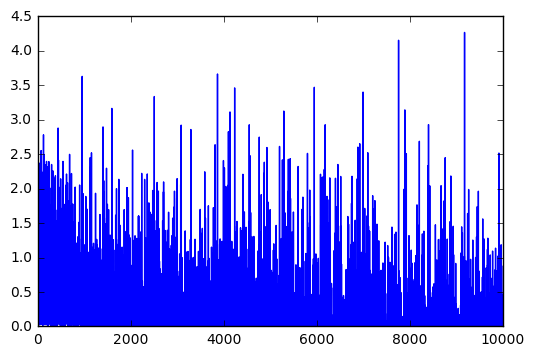

In [16]:
# Plot the training error against training steps
plt.plot(error);plt.show()

We see the typical issue /w SGD as the instability in convergence.

Also the training takes some time when we set to run [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) 100000 times. Here is the ending part of the training when executed with a script

<pre>
80000 0.000136106936437
81000 0.00291440009588
82000 4.15558852449e-06
83000 1.90212924141e-05
84000 9.86713731682e-06
85000 1.86549867446e-05
86000 0.000400129476663
87000 0.000284823671883
88000 0.00395473070337
89000 2.80480636674e-07
90000 1.66010474845e-05
91000 0.00124359641685
92000 0.000165318505639
93000 0.0211342304704
94000 0.000218570713099
95000 0.00102682935203
96000 1.32300955717e-05
97000 8.5065569468e-05
98000 3.27005038972e-05
99000 1.78666428421e-07
</pre>